In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Submission.csv')
df.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [4]:
# Drop unnecessary index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df = df.drop_duplicates()

In [6]:
df = df[df['Item_Outlet_Sales'] >= 0].copy()


In [8]:
df.reset_index(drop=True, inplace=True)
print("Cleaned Data Shape:", df.shape)
print(df.head())

Cleaned Data Shape: (5613, 3)
  Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1636.244023
1           FDW14            OUT017        1409.355910
2           NCN55            OUT010         710.594286
3           FDQ58            OUT017        2355.184955
4           FDY38            OUT027        5857.916205


In [14]:
print("/nSummaey statistics")
print(df.describe())

/nSummaey statistics
        Unnamed: 0  Item_Outlet_Sales
count  5681.000000        5681.000000
mean   2840.000000        2177.673697
std    1640.107771        1291.691929
min       0.000000        -100.129007
25%    1420.000000        1083.959472
50%    2840.000000        1953.891192
75%    4260.000000        3171.909850
max    5680.000000        5959.724713


In [17]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0           0
Item_Identifier      0
Outlet_Identifier    0
Item_Outlet_Sales    0
dtype: int64


In [18]:
print("/nDuplicate Rows:", df.duplicated().sum())

/nDuplicate Rows: 0


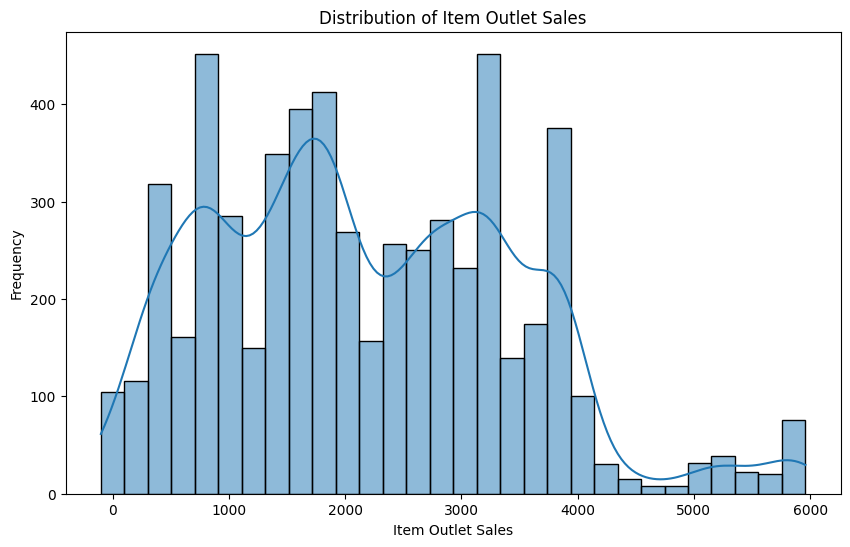

In [7]:
#univariate analysis- sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

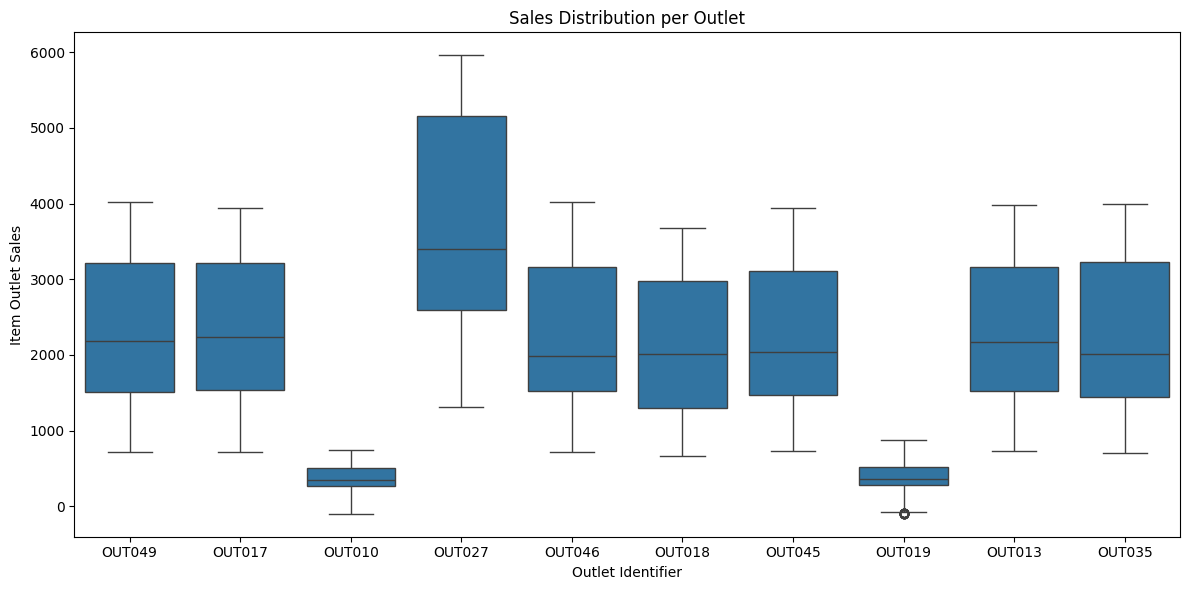

In [9]:
#sales per outlet
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution per Outlet')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.tight_layout()
plt.show()

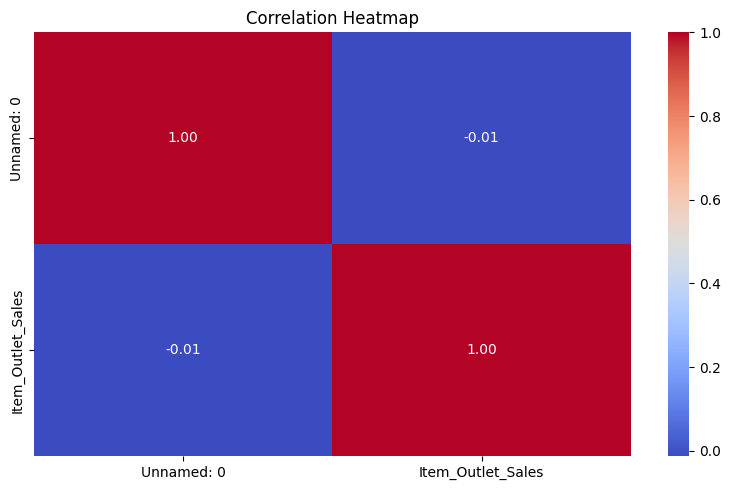

In [10]:
#correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

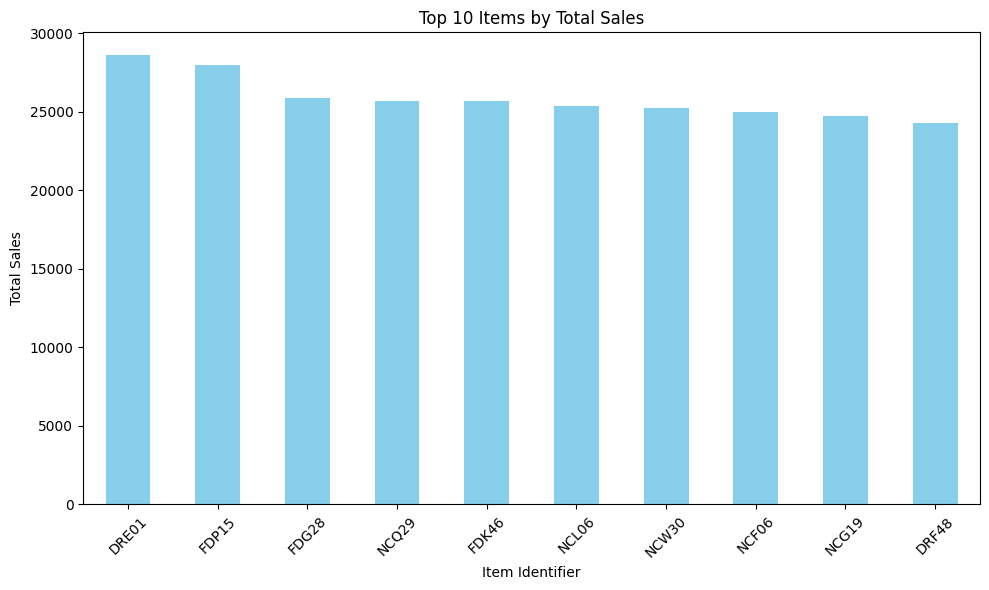

In [11]:
# Sales by Item Identifier (Top 10)
top_items = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Items by Total Sales')
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# 1. Extract Item Category from Item_Identifier
df['Item_Category'] = df['Item_Identifier'].str[:2]  # First 2 letters as Category

In [13]:
# 2. Total Sales per Outlet
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
outlet_sales.columns = ['Outlet_Identifier', 'Total_Sales_Outlet']

In [14]:

# Merge with Original Dataset
df = df.merge(outlet_sales, on='Outlet_Identifier', how='left')


In [18]:
 #3. Average Sales per Item
item_avg_sales = df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().reset_index()
item_avg_sales.columns = ['Item_Identifier', 'Avg_Sales_Item']

# Merge with Original Dataset
df = df.merge(item_avg_sales, on='Item_Identifier', how='left')

# View New Dataset
print("Dataset Shape after Feature Engineering:", df.shape)
print(df.head())

Dataset Shape after Feature Engineering: (5681, 5)
   Unnamed: 0 Item_Identifier Outlet_Identifier  Item_Outlet_Sales  \
0           0           FDW58            OUT049        1636.244023   
1           1           FDW14            OUT017        1409.355910   
2           2           NCN55            OUT010         710.594286   
3           3           FDQ58            OUT017        2355.184955   
4           4           FDY38            OUT027        5857.916205   

   Avg_Sales_Item  
0     1553.921990  
1     1358.061612  
2     3606.642701  
3     2818.922012  
4     4294.329327  


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [39]:
# Load Dataset
df = pd.read_csv('Submission.csv')

# Feature Engineering

# 1. Create Item_Category
df['Item_Category'] = df['Item_Identifier'].str[:2]

# 2. Total Sales per Outlet
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
outlet_sales.columns = ['Outlet_Identifier', 'Total_Sales_Outlet']
df = df.merge(outlet_sales, on='Outlet_Identifier', how='left')

# 3. Average Sales per Item
item_avg_sales = df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().reset_index()
item_avg_sales.columns = ['Item_Identifier', 'Avg_Sales_Item']
df = df.merge(item_avg_sales, on='Item_Identifier', how='left')

# Define Feature Columns
features = ['Item_Identifier', 'Outlet_Identifier', 'Item_Category',
            'Total_Sales_Outlet', 'Avg_Sales_Item']

X = df[features]
y = df['Item_Outlet_Sales']

# Label Encoding for Categorical Columns
le = LabelEncoder()
for col in ['Item_Identifier', 'Outlet_Identifier', 'Item_Category']:
    X[col] = le.fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Successfully!")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

Data Split Successfully!
X_train Shape: (4544, 5)
X_test Shape: (1137, 5)


<ipython-input-39-160608c76681>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-39-160608c76681>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-39-160608c76681>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 258.9908694731889
R² Score: 0.9594055921409985


In [41]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [42]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [43]:
# Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R² Score:", lr_r2)


Linear Regression RMSE: 401.6260184077571
Linear Regression R² Score: 0.9023795100105113


In [44]:
# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

# Evaluation
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("\nDecision Tree RMSE:", dt_rmse)
print("Decision Tree R² Score:", dt_r2)



Decision Tree RMSE: 335.1912978803545
Decision Tree R² Score: 0.9320040925988831


In [45]:

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest RMSE:", rf_rmse)
print("Random Forest R² Score:", rf_r2)



Random Forest RMSE: 258.9908694731889
Random Forest R² Score: 0.9594055921409985


<ipython-input-46-87185280f0aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_scores, palette='Blues_d')


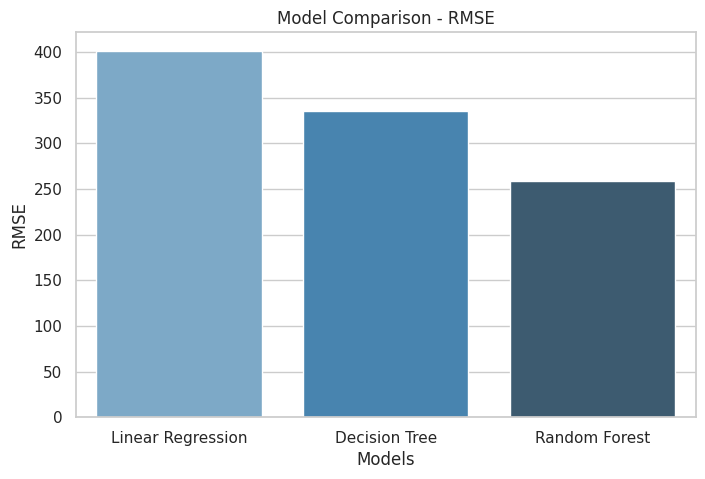

<ipython-input-46-87185280f0aa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='Greens_d')


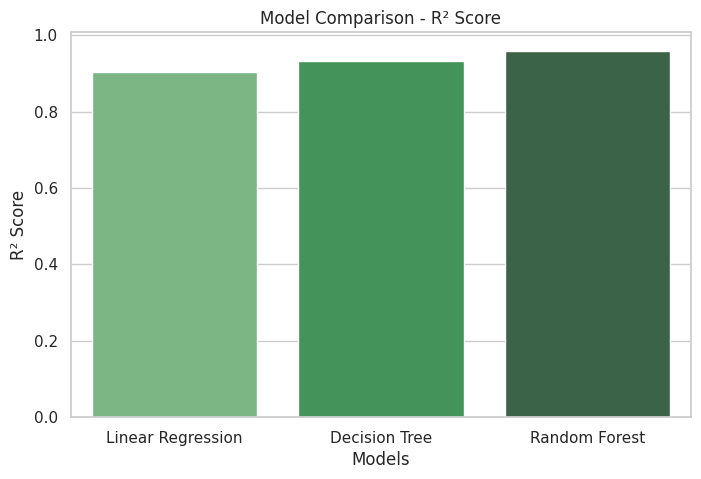

In [46]:
# Prepare Data for Visualization
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores = [lr_rmse, dt_rmse, rf_rmse]
r2_scores = [lr_r2, dt_r2, rf_r2]

# Set Style
sns.set(style="whitegrid")

# Plot RMSE Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=rmse_scores, palette='Blues_d')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.show()

# Plot R² Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores, palette='Greens_d')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.show()

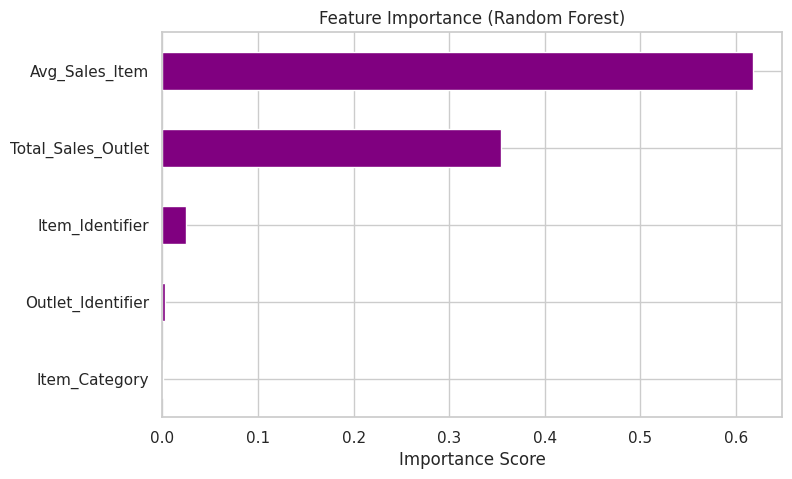

In [47]:
# Feature Importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='purple')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()


# Final Sales Prediction Data Analytics Project


In [48]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# 2. Load Dataset
df = pd.read_csv('Submission.csv')


In [50]:
# 3. Data Cleaning
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)
df = df[df['Item_Outlet_Sales'] >= 0].copy()
df.reset_index(drop=True, inplace=True)

In [51]:
# 4. Feature Engineering
# Item Category
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])

# Total Sales per Outlet
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('sum')
df['Total_Sales_Outlet'] = outlet_sales

# Average Sales per Item
item_sales = df.groupby('Item_Identifier')['Item_Outlet_Sales'].transform('mean')
df['Avg_Sales_Item'] = item_sales

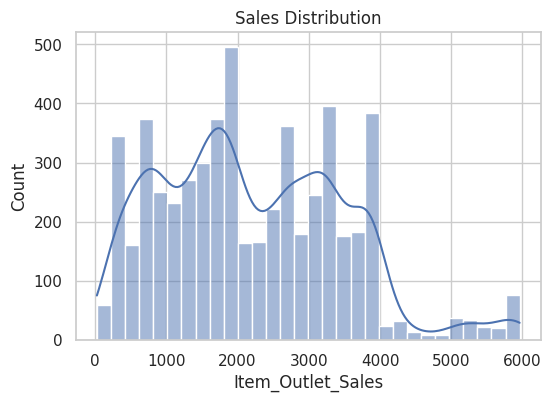

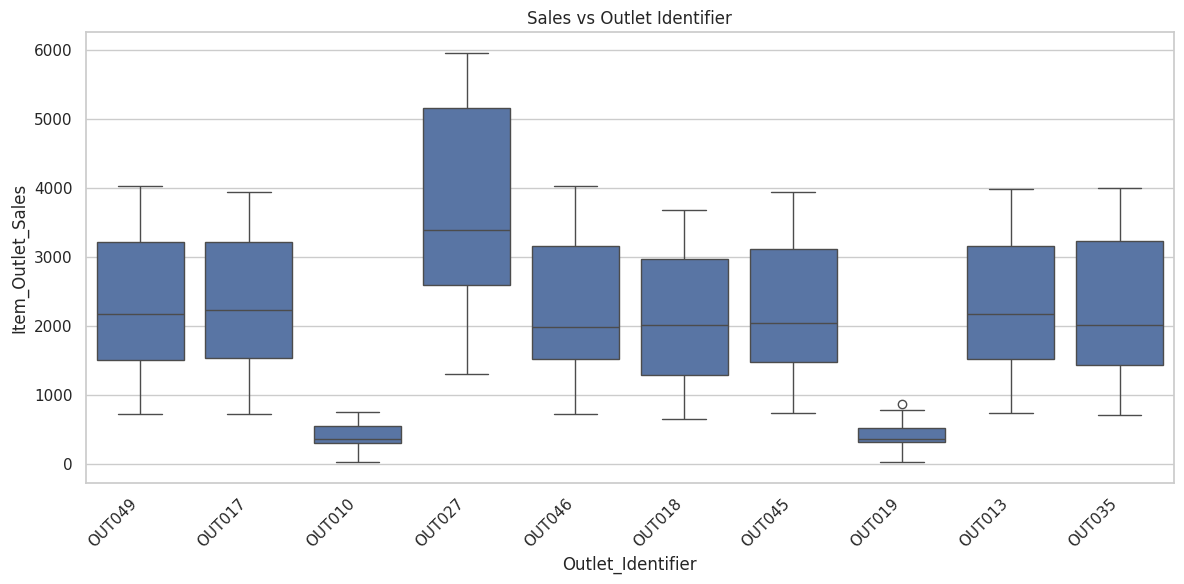

In [55]:
# 5. Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

# Check if 'Outlet_Identifier' is the intended column
plt.figure(figsize=(12, 6))  # Adjust width for better visibility
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)  # Changed to 'Outlet_Identifier'
plt.title('Sales vs Outlet Identifier')  # Update title accordingly
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [56]:
# 6. Prepare Data for Modeling
features = ['Item_Identifier', 'Outlet_Identifier', 'Item_Category', 'Total_Sales_Outlet', 'Avg_Sales_Item']
X = df[features]
y = df['Item_Outlet_Sales']

# Label Encoding
le = LabelEncoder()
for col in ['Item_Identifier', 'Outlet_Identifier', 'Item_Category']:
    X[col] = le.fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-56-17fc279f2b04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-56-17fc279f2b04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-56-17fc279f2b04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [57]:
# 7. Model Building
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

In [58]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

In [59]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

<ipython-input-60-1981b0d48db7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_scores, palette='Blues_d')


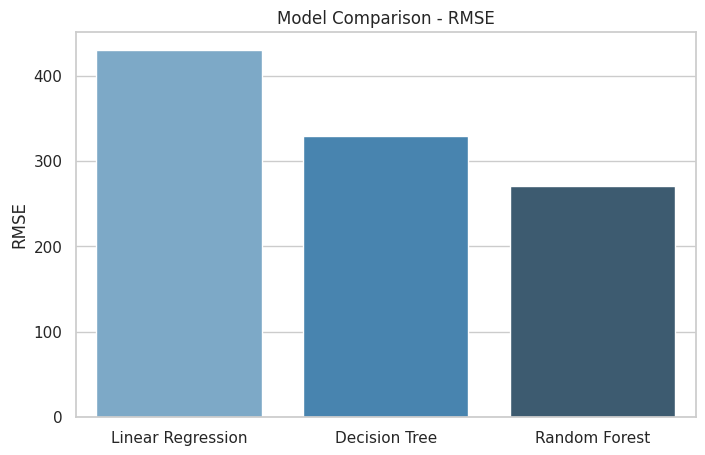

<ipython-input-60-1981b0d48db7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


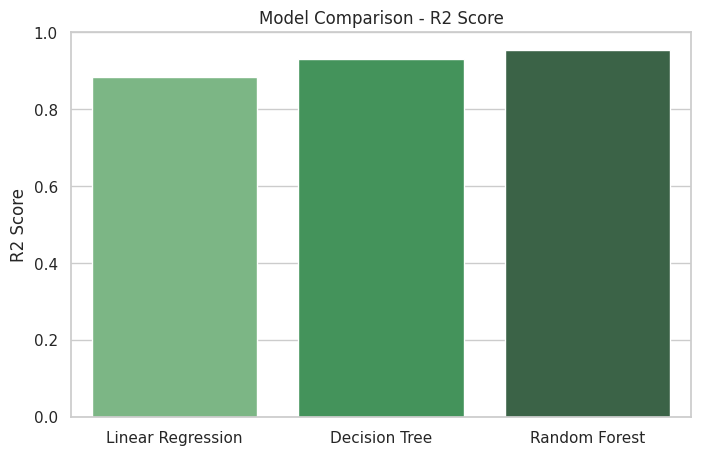

In [60]:
# 8. Visualization of Model Performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores = [lr_rmse, dt_rmse, rf_rmse]
r2_scores = [lr_r2, dt_r2, rf_r2]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=rmse_scores, palette='Blues_d')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.show()


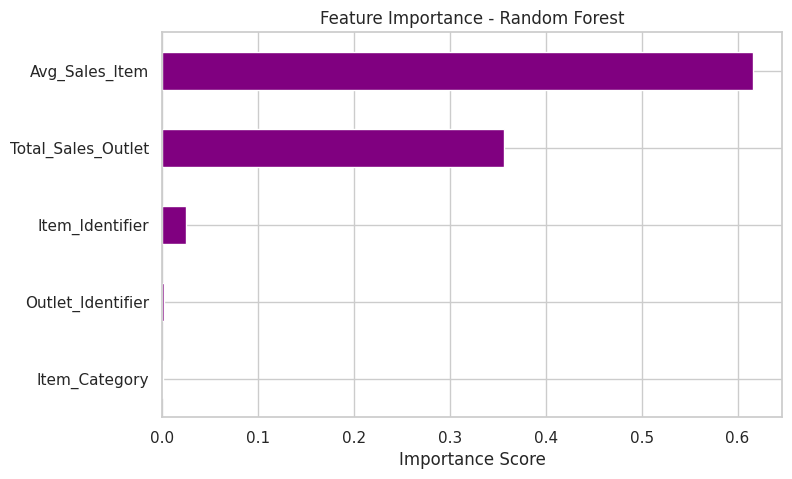

In [61]:
# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feature_importance.sort_values().plot(kind='barh', color='purple')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

In [62]:
# 9. Final Recommendation
print("""
Recommendation:
- Deploy Random Forest Regressor for future sales prediction.
- Focus on price optimization and outlet-specific marketing.
- Improve visibility and marketing of underperforming item categories.
- Optimize inventory during seasonal sales peaks.
""")



Recommendation:
- Deploy Random Forest Regressor for future sales prediction.
- Focus on price optimization and outlet-specific marketing.
- Improve visibility and marketing of underperforming item categories.
- Optimize inventory during seasonal sales peaks.

